In [1]:
import matplotlib.pyplot as plt
import itertools
import pickle
legend_properties = {'weight':'bold'}

def get_indices_at_hamming_distance(base_index, dimension, hamming_dist):
    indices = []
    positions = range(dimension)

    # Flip exactly 'hamming_dist' bits
    for bits_to_flip in itertools.combinations(positions, hamming_dist):
        mask = 0
        for pos in bits_to_flip:
            mask |= (1 << pos)  # set bit at position `pos` to 1
        new_index = base_index ^ mask  # flip bits using XOR
        indices.append(new_index)

    return indices

dimension = 10
base_index = 2 ** dimension - 1  # [1, 1, ..., 1] in binary → 1023
index_across_distance = []
for hamming_distance in range(1, 11):
    index_list = get_indices_at_hamming_distance(base_index, dimension, hamming_distance)
    print(len(index_list))
    index_across_distance.append(index_list)


10
45
120
210
252
210
120
45
10
1


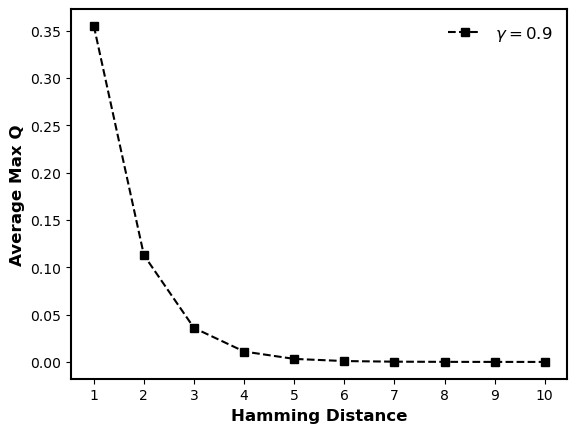

<Figure size 640x480 with 0 Axes>

In [3]:
from Q_learning import Agent
import numpy as np
results = []
gamma = 0.9
for _ in range(1000):
    q_agent = Agent(N=10, peak=1)
    for index in range(100):
        q_agent.learn(alpha=0.2, gamma=gamma)
    max_q_across_distance = []
    for index_list in index_across_distance:
        q_values = []
        for index in index_list:
            q_values.append(max(q_agent.Q_table[index]))
        max_q_value = sum(q_values) / len(q_values)
        max_q_across_distance.append(max_q_value)
    results.append(max_q_across_distance)
average_list = np.mean(results, axis=0)
# Figure 1: Ave Max Q across Hamming Distance
x =  range(1, 11)
# x = [50, 100, 150]
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, average_list, "k--s", label=r"$\gamma={0}$".format(gamma))
# plt.plot(x, max_performance, "k-v", label="Max")
plt.xlabel("Hamming Distance", fontweight='bold', fontsize=12)
plt.ylabel('Average Max Q', fontweight='bold', fontsize=12)
plt.xticks(x)
# ax.set_ylim(0, 0.7)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(r"\Max_Q_across_Hamming.png", transparent=True, dpi=300)
plt.show()
plt.clf()
# should be start with 0.73 (max) and 0.82 (softmax)
# at the third sample, should be as close as to 1% difference

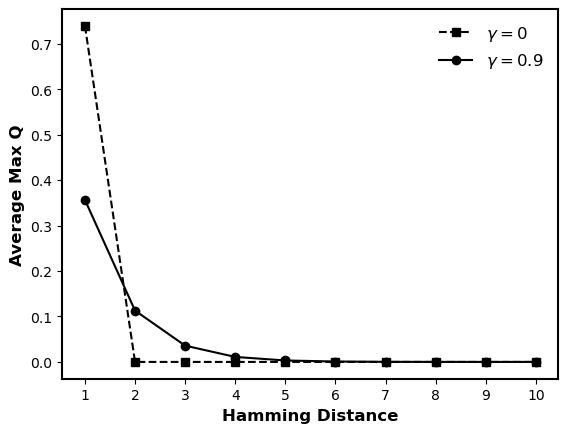

Gamma=0:  [0.73907488 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
Gamma=0.9:  [3.56290745e-01 1.12897453e-01 3.57968668e-02 1.09782502e-02
 3.18036153e-03 8.75291573e-04 2.04455546e-04 5.42971227e-05
 1.23518745e-05 0.00000000e+00]


<Figure size 640x480 with 0 Axes>

In [5]:
from Q_learning import Agent
import numpy as np

# gamma = 0
results_gamma_0 = []
for _ in range(100):
    np.random.seed(None)
    q_agent = Agent(N=10, peak=1)
    for index in range(100):
        q_agent.learn(alpha=0.2, gamma=0)
    max_q_across_distance = []
    for index_list in index_across_distance:
        max_q_values = []
        for index in index_list:
            max_q_values.append(max(q_agent.Q_table[index]))
        ave_max_q_value = sum(max_q_values) / len(max_q_values)
        max_q_across_distance.append(ave_max_q_value)
    results_gamma_0.append(max_q_across_distance)
average_list_gamma_0 = np.mean(results_gamma_0, axis=0)

# gamma = 0.9
results_gamma_09 = []
for _ in range(100):
    np.random.seed(None)
    q_agent = Agent(N=10, peak=1)
    for index in range(100):
        q_agent.learn(alpha=0.2, gamma=0.9)
    max_q_across_distance = []
    for index_list in index_across_distance:
        max_q_values = []
        for index in index_list:
            max_q_values.append(max(q_agent.Q_table[index]))
        ave_max_q_value = sum(max_q_values) / len(max_q_values)
        max_q_across_distance.append(ave_max_q_value)
    results_gamma_09.append(max_q_across_distance)
average_list_gamma_09 = np.mean(results_gamma_09, axis=0)

# Figure 1: Ave Max Q across Hamming Distance
x =  range(1, 11)
# x = [50, 100, 150]
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, average_list_gamma_0, "k--s", label=r"$\gamma={0}$".format(0))
plt.plot(x, average_list_gamma_09, "k-o", label=r"$\gamma={0}$".format(0.9))
# plt.plot(x, max_performance, "k-v", label="Max")
plt.xlabel("Hamming Distance", fontweight='bold', fontsize=12)
plt.ylabel('Average Max Q', fontweight='bold', fontsize=12)
plt.xticks(x)
# ax.set_ylim(0, 0.7)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(r"Max_Q_across_Hamming.png", transparent=True, dpi=300)
plt.show()
plt.clf()
print("Gamma=0: ", average_list_gamma_0)
print("Gamma=0.9: ", average_list_gamma_09)

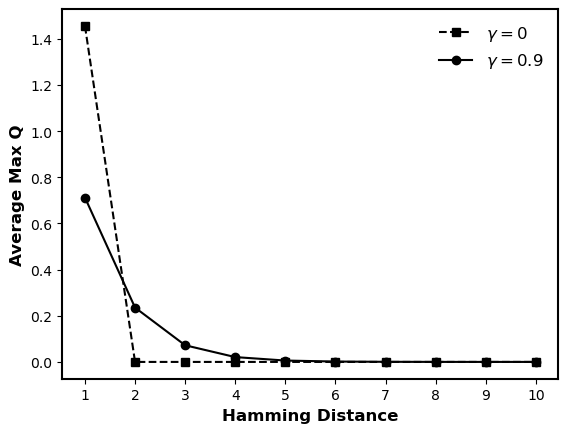

Gamma=0:  [1.45638734 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
Gamma=0.9:  [7.12531946e-01 2.35477331e-01 7.21882522e-02 2.09300863e-02
 5.95603011e-03 1.62843510e-03 5.26704622e-04 1.06876142e-04
 1.75148005e-05 0.00000000e+00]


<Figure size 640x480 with 0 Axes>

In [6]:
from Q_learning import Agent
import numpy as np

# gamma = 0
results_gamma_0 = []
for _ in range(100):
    np.random.seed(None)
    q_agent = Agent(N=10, peak=2)
    for index in range(100):
        q_agent.learn(alpha=0.2, gamma=0)
    max_q_across_distance = []
    for index_list in index_across_distance:
        max_q_values = []
        for index in index_list:
            max_q_values.append(max(q_agent.Q_table[index]))
        ave_max_q_value = sum(max_q_values) / len(max_q_values)
        max_q_across_distance.append(ave_max_q_value)
    results_gamma_0.append(max_q_across_distance)
average_list_gamma_0 = np.mean(results_gamma_0, axis=0)

# gamma = 0.9
results_gamma_09 = []
for _ in range(100):
    np.random.seed(None)
    q_agent = Agent(N=10, peak=2)
    for index in range(100):
        q_agent.learn(alpha=0.2, gamma=0.9)
    max_q_across_distance = []
    for index_list in index_across_distance:
        max_q_values = []
        for index in index_list:
            max_q_values.append(max(q_agent.Q_table[index]))
        ave_max_q_value = sum(max_q_values) / len(max_q_values)
        max_q_across_distance.append(ave_max_q_value)
    results_gamma_09.append(max_q_across_distance)
average_list_gamma_09 = np.mean(results_gamma_09, axis=0)

# Figure 1: Ave Max Q across Hamming Distance
x =  range(1, 11)
# x = [50, 100, 150]
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, average_list_gamma_0, "k--s", label=r"$\gamma={0}$".format(0))
plt.plot(x, average_list_gamma_09, "k-o", label=r"$\gamma={0}$".format(0.9))
# plt.plot(x, max_performance, "k-v", label="Max")
plt.xlabel("Hamming Distance", fontweight='bold', fontsize=12)
plt.ylabel('Average Max Q', fontweight='bold', fontsize=12)
plt.xticks(x)
# ax.set_ylim(0, 0.7)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(r"\Max_Q_across_Hamming.png", transparent=True, dpi=300)
plt.show()
plt.clf()
print("Gamma=0: ", average_list_gamma_0)
print("Gamma=0.9: ", average_list_gamma_09)
# should be start with 0.73 (max) and 0.82 (softmax)
# at the third sample, should be as close as to 1% difference

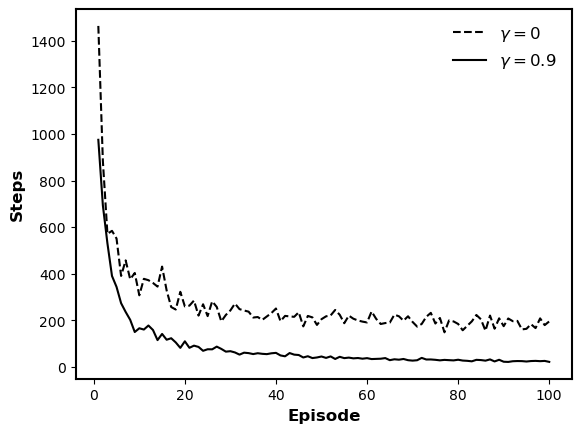

Gamma=0:  [1463.98  883.    570.88  583.88  550.77  390.18  457.07  375.98  402.9
  306.96  377.78  371.86  359.99  344.44  430.35  327.9   256.62  245.84
  321.99  259.29  262.63  284.44  219.83  268.46  217.65  281.12  257.07
  195.09  222.64  242.2   271.42  247.6   241.78  236.71  211.57  213.66
  201.47  216.18  230.7   250.29  195.87  218.53  216.46  214.56  233.97
  173.5   218.37  212.19  179.84  204.47  216.74  220.43  244.07  223.34
  187.11  219.73  206.42  198.91  193.99  190.39  237.44  205.89  183.76
  187.83  189.9   223.74  216.92  197.9   216.97  192.52  172.64  183.92
  214.55  231.59  185.83  209.58  148.02  199.08  194.73  183.98  156.81
  175.96  194.94  222.53  204.05  155.03  219.97  163.58  208.1   174.4
  207.44  195.8   197.09  160.56  163.09  182.95  166.08  207.91  178.98
  194.86]
Gamma=0.9:  [974.84 692.75 530.01 390.14 343.02 273.13 235.53 201.6  149.32 165.41
 159.92 177.23 158.01 114.59 141.12 116.22 122.58 104.6   81.19 109.37
  81.52  90.8   85.28  68

<Figure size 640x480 with 0 Axes>

In [8]:
# Time to Solution as Organizational Performance
# Without credit assignment (gamma=0) vs. With credit assignment (gamma=0.9)
from Q_learning import Agent
import numpy as np

# gamma = 0
steps_gamma_0 = []
steps_across_episode_agent = []
for _ in range(100):
    np.random.seed(None)
    q_agent = Agent(N=10, peak=1)
    steps_across_episode = []
    for index in range(100):
        q_agent.learn(alpha=0.2, gamma=0)
        steps_across_episode.append(q_agent.steps)
    steps_across_episode_agent.append(steps_across_episode)
steps_gamma_0 = np.mean(steps_across_episode_agent, axis=0)

# gamma = 0.9
steps_gamma_09 = []
steps_across_episode_agent = []
for _ in range(100):
    np.random.seed(None)
    q_agent = Agent(N=10, peak=2)
    steps_across_episode = []
    for index in range(100):
        q_agent.learn(alpha=0.2, gamma=0.9)
        steps_across_episode.append(q_agent.steps)
    steps_across_episode_agent.append(steps_across_episode)
steps_gamma_09 = np.mean(steps_across_episode_agent, axis=0)

# Figure 1: Ave Max Q across Hamming Distance
x =  range(1, 101)
# x = [50, 100, 150]
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, steps_gamma_0, "k--", label=r"$\gamma={0}$".format(0))
plt.plot(x, steps_gamma_09, "k-", label=r"$\gamma={0}$".format(0.9))
# plt.plot(x, max_performance, "k-v", label="Max")
plt.xlabel("Episode", fontweight='bold', fontsize=12)
plt.ylabel('Steps', fontweight='bold', fontsize=12)
# plt.xticks(x)
# ax.set_ylim(0, 0.7)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(r"Steps_across_episode.png", transparent=True, dpi=300)
plt.show()
plt.clf()
print("Gamma=0: ", steps_gamma_0)
print("Gamma=0.9: ", steps_gamma_09)
# should be start with 0.73 (max) and 0.82 (softmax)
# at the third sample, should be as close as to 1% difference

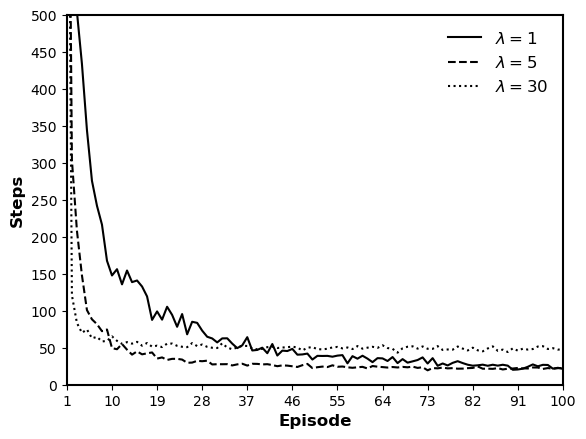

Lambda=5:  [1129.02  304.02  208.38  148.03  100.96   88.47   81.92   72.43   74.7
   49.48   48.02   55.09   47.41   40.69   45.11   41.11   42.49   43.64
   35.37   36.93   33.5    35.     35.04   34.01   29.68   29.95   32.31
   31.8    32.55   27.43   27.78   27.73   27.82   26.1    27.52   28.39
   25.89   28.31   28.19   27.46   27.8    26.6    25.06   26.17   25.83
   24.96   24.02   26.41   28.16   22.5    23.68   24.52   23.88   26.26
   24.3    24.64   23.55   22.89   23.57   24.19   21.97   25.28   24.42
   23.85   23.23   23.95   23.34   24.14   23.55   24.51   22.75   23.68
   19.5    22.5    22.17   23.21   22.11   22.44   21.69   21.81   22.41
   22.7    24.75   21.64   21.71   21.46   22.48   20.63   21.69   21.93
   22.66   22.12   21.97   23.35   23.25   21.35   22.52   21.68   22.38
   22.63]
Lambda=30:  [1101.74  120.97   83.53   70.24   74.81   62.84   64.67   58.52   59.24
   65.38   59.35   55.27   57.63   55.58   58.     52.8    56.41   51.48
   52.86   50.92   

<Figure size 640x480 with 0 Axes>

In [16]:
# Time to Solution as Organizational Performance
# add lambda, the length of updated preceding state-action pairs
from Q_learning import Agent
import numpy as np

# lambda_ = 1
steps_lambda_1 = []
steps_across_episode_agent = []
for _ in range(100):
    np.random.seed(None)
    q_agent = Agent(N=10, peak=1)
    steps_across_episode = []
    for index in range(100):
        q_agent.learn(alpha=0.2, gamma=0.9)
        steps_across_episode.append(q_agent.steps)
    steps_across_episode_agent.append(steps_across_episode)
steps_lambda_1 = np.mean(steps_across_episode_agent, axis=0)

lambda_ = 5
steps_lambda_5 = []
steps_across_episode_agent = []
for _ in range(100):
    np.random.seed(None)
    q_agent = Agent(N=10, peak=1)
    steps_across_episode = []
    for index in range(100):
        q_agent.learn_with_lambda(alpha=0.2, gamma=0.9, lambda_=lambda_)
        steps_across_episode.append(q_agent.steps)
    steps_across_episode_agent.append(steps_across_episode)
steps_lambda_5 = np.mean(steps_across_episode_agent, axis=0)

lambda_ = 30
steps_lambda_30 = []
steps_across_episode_agent = []
for _ in range(100):
    np.random.seed(None)
    q_agent = Agent(N=10, peak=1)
    steps_across_episode = []
    for index in range(100):
        q_agent.learn_with_lambda(alpha=0.2, gamma=0.9, lambda_=lambda_)
        steps_across_episode.append(q_agent.steps)
    steps_across_episode_agent.append(steps_across_episode)
steps_lambda_30 = np.mean(steps_across_episode_agent, axis=0)

# Figure 4: Steps across Episodes
x =  range(1, 101)
# x = [50, 100, 150]
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, steps_lambda_1, "k-", label=r"$\lambda={0}$".format(1))
plt.plot(x, steps_lambda_5, "k--", label=r"$\lambda={0}$".format(5))
plt.plot(x, steps_lambda_30, "k:", label=r"$\lambda={0}$".format(30))
plt.xlabel("Episode", fontweight='bold', fontsize=12)
plt.ylabel('Steps', fontweight='bold', fontsize=12)
ax.set_xlim(1, 100)
ax.set_xticks(range(1, 101, 9))
ax.set_ylim(0, 500)
ax.set_yticks(range(0, 501, 50))
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(r"Steps_across_episode_lambda.png", transparent=True, dpi=300)
plt.show()
plt.clf()
print("Lambda=5: ", steps_lambda_5)
print("Lambda=30: ", steps_lambda_30)

[]
